## Problema de negócio

Uma grande multinacional varejista do ramo de supermercados deseja ingressar no mercado brasileiro.


Você é o responsável pela análise que servirá de base para a estratégia (tomada de decisão) de entrada dessa empresa no Brasil.

Elabore uma apresentação para os investidores desta empresa buscando realizar as seguintes tarefas: 

Utilizando os dados da ABA Informações_Municipais desse documento:

- Realize uma classificação dos municípios brasileiros com base nas informações disponíveis e faça uma caracterização dos municípios em grupos.

- Elabore uma forma de classificar um novo município entre os grupos já criados na etapa anterior.

- Responda em sua apresentação quais grupos de municípios deveriam ser a porta de entrada para empresa no país e porque.


### Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot')

### Análise dos Dados

In [2]:
dados = pd.read_excel('..\data\Case Seleção 2021.xls', sheet_name=1, skiprows=3); dados.head()

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000",...,"Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000"
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,...,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,...,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,...,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,...,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
4,310020,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,...,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,293360,Xique-Xique (BA),5987.5,7.4,517.242182,55.41,83.11,3.84,37.14,73.31,...,70.69,3.16,14678,17840,1950,2450,40373,44718,31565,13153
5503,251740,Zabelê (PB),143.4,12.8,268.334474,60.74,58.40,2.87,42.31,89.61,...,63.05,2.89,816,954,170,170,1728,1853,1186,667
5504,355715,Zacarias (SP),319.7,6.1,447.390579,76.02,8.13,2.21,14.77,195.16,...,86.92,4.82,971,1135,100,152,1961,1947,1332,615
5505,211400,Zé Doca (MA),2044.4,24.1,186.466943,60.02,61.43,3.33,44.67,77.08,...,65.24,2.89,12848,17631,1450,2302,36524,46134,29082,17052


In [3]:
# O código do município será retirados uma vez que não será relevante para análise
dados.drop('Código', axis=1, inplace=True)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 24 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Município                                                              5507 non-null   object 
 1   Área (km²)                                                             5507 non-null   float64
 2   Densidade demográfica, 2000                                            5507 non-null   float64
 3   Distância à capital (km)                                               5507 non-null   float64
 4   Esperança de vida ao nascer, 2000                                      5507 non-null   float64
 5   Mortalidade até um ano de idade, 2000                                  5507 non-null   float64
 6   Taxa de fecundidade total, 2000                                        5507 non-null   f

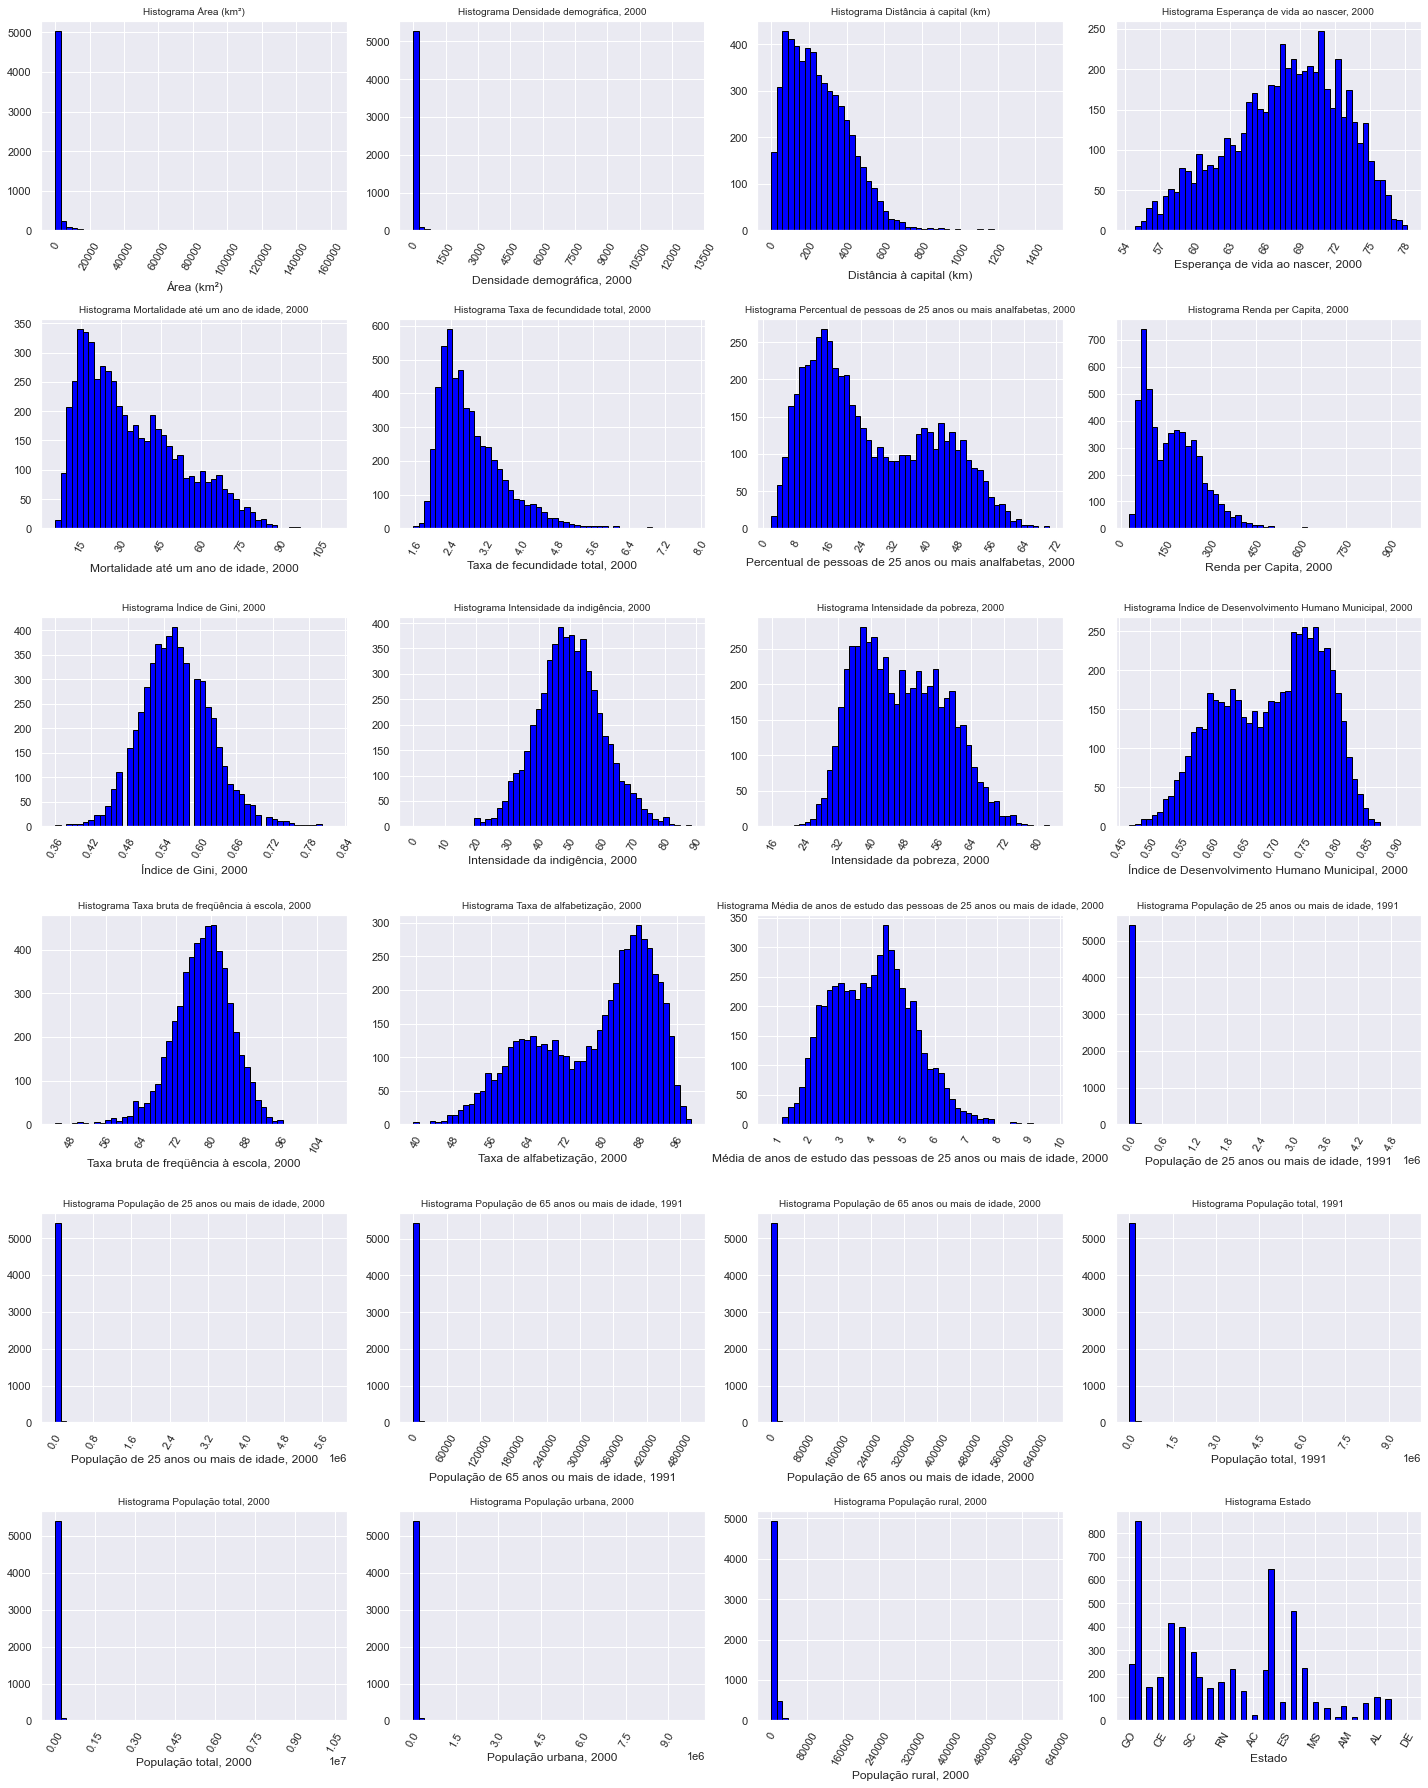

In [16]:
# Observando a distribuição das variáveis
# Definindo o tamanho do gráfico
df = dados.drop('Município', axis=1)

fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(20)

# Gerando os plots
for i, col in enumerate(df.columns):
    
    plt.subplot(6,4,i+1)
    plt.hist(df[col], color = 'blue', edgecolor = 'black', bins = int(50))

    plt.title('Histograma '+ str(col), fontdict={'fontsize':10})
    plt.xlabel(col)
    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    plt.xticks(rotation=60)

    
fig.tight_layout()
plt.show()

A maior parte das variáveis apresenta uma curva de distribuição Gaussinana

In [67]:
# Criando uma coluna de 'Estado' para novas análises
dados['Estado'] = dados['Município'].apply(lambda x: str(x.split('(')[1]).replace(')',''))
dados['Estado'] = dados['Estado'].apply(lambda x: 'DE' if len(x) != 2 else x)
dados.head()

,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000",...,"Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",Estado
0,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,...,4.87,1872,2433,121,227,4227,4971,3096,1875,GO
1,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,...,4.36,3308,3781,354,459,6492,6446,3927,2519,MG
2,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,...,4.24,4241,5918,446,686,9402,11452,7206,4246,GO
3,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,...,4.28,33554,44897,3792,4688,99989,119152,70843,48309,PA
4,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,...,4.78,10163,12406,1084,1595,20689,22360,19022,3338,MG


In [68]:
# Número de municípios por estado:
dados['Estado'].value_counts()

MG    853
SP    645
RS    467
BA    415
PR    399
SC    293
GO    242
PB    223
PI    221
MA    217
PE    184
CE    184
RN    166
PA    143
TO    139
MT    126
AL    101
RJ     91
ES     77
MS     77
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
DE      1
Name: Estado, dtype: int64

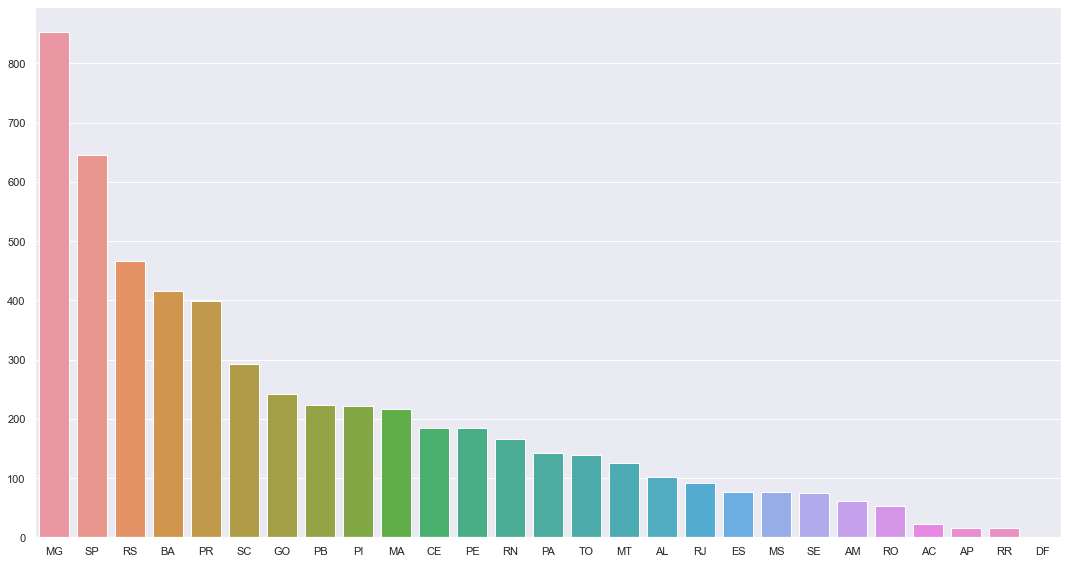

In [69]:
# Criando a Figura
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)

#Criando o plot
sns.set(style="darkgrid")
uf = dados_box['Estado'].unique()
cont = dados_box['Estado'].value_counts()
sns.barplot(x=cont.index,y=cont.values)
fig.tight_layout()